Miguel Mattis
HW 2-4
6/12/20 

In [1]:
# importing useful libraries for future use throughout the code
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chisquare as chi
from scipy import stats as sp
import matplotlib as mpl
import seaborn as sns


# main dataframe
gsd=pd.read_csv("GSS2008.csv")


<h4>A) Is there sufficient evidence to conclude that people who work for the government (WRKGOVT: 1 =Government, 2 = Private) work a different number of hours (HRS), on average?</h4>

This statement of government and private employees working different hours is true. Private employees on average work about 0.11 more hours than government employees.

This is also indicated by the p-value of  roughly 0.204, which means we are unable to deny the null hypothesis. 
This is clearly not a significant difference as one would see upon reviewing the
Kernel Density Estimate image below.

'Government': 42.466, 'Private': 42.578

In [7]:
# Question (A)
def gvt_private_hrs():
    global government_hours, private_hours, hour_mean_dict
    # 1.0 = Government
    government_hours = gsd[(gsd['WRKGOVT']==1.0) & (gsd['INCOME'] > 0)].mean()['HRS']
    # 2.0 = Private
    private_hours = gsd[(gsd['WRKGOVT']==2.0) & (gsd['INCOME'] > 0)].mean()['HRS']
    hour_mean_dict = {'Government':round(government_hours, 3), 'Private':round(private_hours, 3)}
    return print(hour_mean_dict)
gvt_private_hrs()

{'Government': 42.466, 'Private': 42.578}


In [8]:
# T-test code to obtain t-statistic and p-value

sp.stats.ttest_ind((gsd['INCOME'][gsd['WRKGOVT']==1.0]),(gsd['INCOME'][gsd['WRKGOVT']==2.0]),axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=1.2708224380164619, pvalue=0.20404749839350106)

The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. The null hypothesis states that there is no significant difference between specified populations, any observed difference could be due to sampling or experimental error. The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.

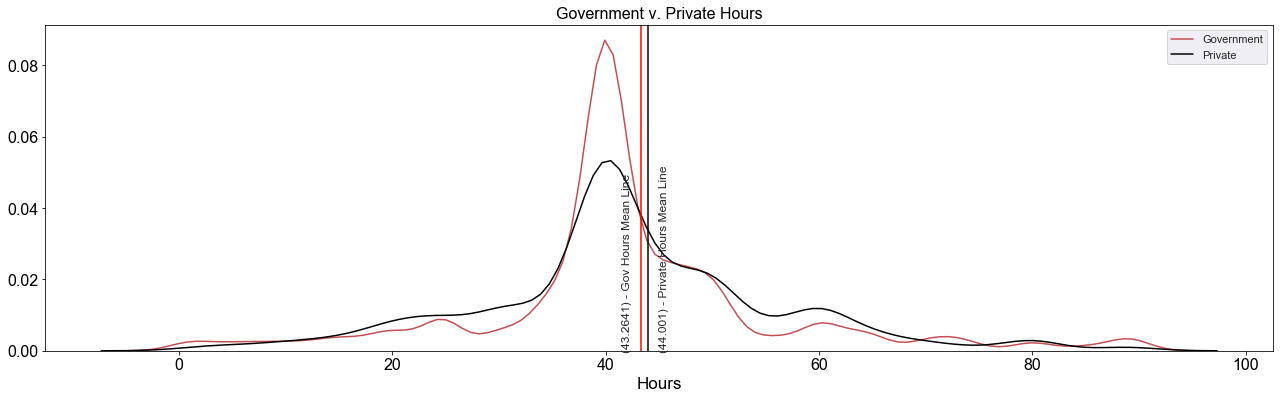

In [9]:
# using a Kernel Density to show the distribution of the data between the two sets
def hours_viz():
    global gvhrs, pvhrs
    gvhrs = gsd[(gsd['WRKGOVT']==1.0)]['HRS']
    pvhrs = gsd[(gsd['WRKGOVT']==2.0)]['HRS']
    # creates the figure and ax for the kde plot
    fig, ax = plt.subplots()
    sns.set(style='darkgrid')
    # allows modification of the figure size in inches
    plt.gcf().set_size_inches(22,6)
    # controls the x and y labels & ticks
    plt.yticks(fontsize=16)
    plt.xlabel('No. of Hours', fontsize=17)
    plt.xticks(fontsize=16)
    # modifies the title
    ax.set_title('Government v. Private Hours', fontsize=16)
    # the actual figures themselves overlapping
    sns.distplot(gvhrs, ax=ax, color='r', label='Government', hist=False)
    sns.distplot(pvhrs, ax=ax, color='black', label='Private', hist=False)
    # ax.set(yticks=[])
    gov = plt.axvline(x=43.2641, color='red')
    plt.text(41.5,0,'(43.2641) - Gov Hours Mean Line',rotation=90)
    priv = plt.axvline(x=44.001, color='black')
    plt.text(45,0,'(44.001) - Private Hours Mean Line',rotation=90)
    plt.xlabel('Hours')

hours_viz()

In [10]:
# Question (B)
def income_before_gov_private():
    global government_income_before, private_income_before, income_dict_before
    # selects government above 0
    government_income_before = gsd[(gsd['WRKGOVT']==1.0) & (gsd['INCOME']> 0)].mean()['INCOME']
    # selects private above 0
    private_income_before = gsd[(gsd['WRKGOVT']==2.0) & (gsd['INCOME'] > 0)].mean()['INCOME']
    income_dict_before = {'Government':round(government_income_before,2), 'Private':round(private_income_before,2)}
    return print(income_dict_before)

income_before_gov_private()

{'Government': 44621.83, 'Private': 40847.81}


<h4>B) Is there sufficient evidence to conclude that people who work for the government (WRKGOVT: 1 =Government, 2 = Private) have a different income (INCOME), on average?</h4>

There is sufficient evidence that the average income is different, however it is not so clear that the difference between the two averages is significant. This is also indicated by the p-value which is 0.877 and the the t-statistic which is -0.155 which imply that we cannot reject the null hypothesis.

In [11]:
# T-test code to obtain t-statistic and p-value

sp.stats.ttest_ind((gsd['HRS'][gsd['WRKGOVT']==1.0]),(gsd['HRS'][gsd['WRKGOVT']==2.0]),axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-0.1546899370912468, pvalue=0.8770923978241174)

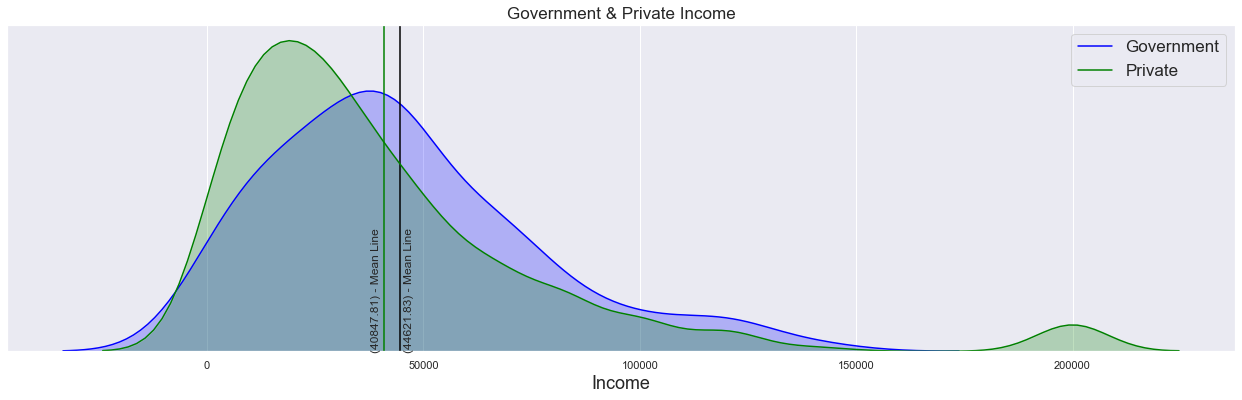

In [12]:
def hours_viz():
    # creates the figure and ax for the kde plot
    fig, ax = plt.subplots()
    fig.set_size_inches( 22, 6)
    sns.set(style='darkgrid')
    # government income
    gvibf_corection = gsd[(gsd['WRKGOVT']==1.0) ]['INCOME']
    # private income
    pvibf_correction = gsd[(gsd['WRKGOVT']==2.0)]['INCOME']
    # plots of each label
    # mean line for government 
    before = sns.kdeplot(gvibf_corection, ax=ax, color='blue', label='Government', shade=True)
    gvibf_correction_avg = plt.axvline(x=44621.83, color='black')
    plt.text(45500,0,'(44621.83) - Mean Line',rotation=90)
    # mean line for private income 
    before = sns.kdeplot(pvibf_correction, ax=ax, color='green', label='Private', shade=True)
    pvibf_correction_avg = plt.axvline(x=40847.81, color='green')
    plt.text(38000,0,'(40847.81) - Mean Line',rotation=90)
    #hides the yticks
    before.set(yticks=[])
    # sets the title for the whole chart
    before.set_title('Government & Private Income', fontsize=17)
    plt.xlabel('Income',fontsize=18)
    plt.legend(fontsize=17)
hours_viz()

In [13]:
# Question (C)
# represents the amount of time at employer private vs government

def time_at_employer():
    global private_empr_years, government_empr_years, empr_dict
    private_empr_years = gsd[(gsd['WRKGOVT']==2.0)].mean()['CUREMPYR']
    government_empr_years = gsd[(gsd['WRKGOVT']==1.0)].mean()['CUREMPYR']
    empr_dict = {'Government':round(government_empr_years,2), 'Private':round(private_empr_years,2)}
    return print(empr_dict)
time_at_employer()

{'Government': 11.11, 'Private': 7.9}


<h4>C) Is there sufficient evidence to conclude that people who work for the
government (WRKGOVT: 1 = Government, 2 = Private) stay with their
employer shorter or longer (CUREMPYR), on average?</h4>
Yes. On average people who work for the government stay at their job for more than 3 years than those
in private employment.
'Government': 11.61 Years, 'Private': 8.29 Years

In [14]:
# T-test code to obtain t-statistic and p-value

sp.stats.ttest_ind((gsd['CUREMPYR'][gsd['WRKGOVT']==1.0]),(gsd['CUREMPYR'][gsd['WRKGOVT']==2.0]),axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=4.137512550645832, pvalue=3.8684003141331824e-05)

Finally, we obtain 

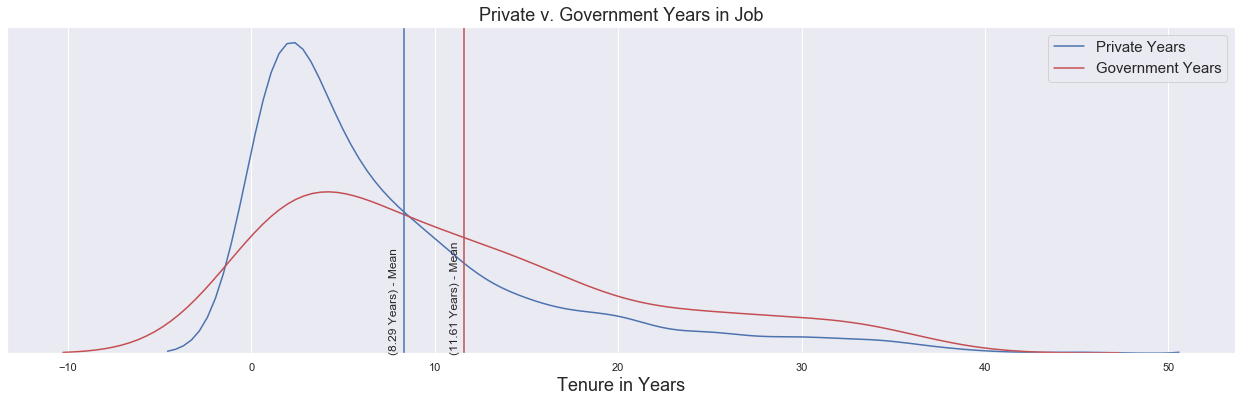

In [15]:
def time_employer_viz():
    pemp_years = gsd[(gsd['WRKGOVT']==2.0)]['CUREMPYR']
    gemp_years = gsd[(gsd['WRKGOVT']==1.0)]['CUREMPYR']
    fig, ax = plt.subplots()
    fig.set_size_inches( 22, 6)
    main_plot = sns.distplot(pemp_years, label='Private Years', hist=False)
    main_plot = sns.distplot(gemp_years, label='Government Years', color='r',hist=False)
    # main_plot.set(yticks=[])
    avg_private = plt.axvline(x=8.29)
    plt.text(7.5,0,'(8.29 Years) - Mean',rotation=90)
    avg_government = plt.axvline(x=11.61, color='r')
    plt.text(10.85,0,'(11.61 Years) - Mean',rotation=90)
    ax.set_title('Private v. Government Years in Job', fontsize=18)
    plt.legend(fontsize=15)
    plt.xlabel('Tenure in Years', fontsize=18)
    ax.set(yticks=[])
    
time_employer_viz()

See chart-figure above for mean line representation of the difference between these two groups' tenure
with an employer, private or government. With a p-value of 3.87 x 10^-5 we can finally reject the null hypothesis and validate that the two values we have obtained are indeed different. The visual above has been confirmed.


In [16]:
# Question (E)
def apply_party(x):
    if x == 1.0:
        return 'Democrat'
    if x == 2.0:
        return 'Republican'
# lambda the x into apply_party() and then apply this logic to the whole series - then assign it to a new column, PARTYID_name
gsd['PARTYID_name'] = gsd['PARTYID3'].apply(lambda x:apply_party(x))

#testing new column before including it into an if else statement below
gsd[(gsd['PARTYID3']==1.0) | (gsd['PARTYID3']==2.0)]['PARTYID3'].value_counts()

#final test - compare the two values - passed
gsd['PARTYID_name'].value_counts()

Republican    746
Democrat      721
Name: PARTYID_name, dtype: int64

<h4>E) For each of the following variables, conduct a test to determine whether Democrats and Republicans (PARTYID3 1 = Democrat, 2 = Republican) diﬀer in their correct answers to the following questions. 
 i) Correct answers to ODDS1: A doctor tells a couple that there is one chance in four that their child will have an inherited disease. Does this mean that if the ﬁrst child has the illness, the next three will not? 1 = Yes, 2 = No. Correct answer: No.
ii) Correct answers to ODDS2: A doctor tells a couple that there is one chance in four that their child will have an inherited disease. Does this mean that each of the couple’s children will have the same risk of suﬀering the illness? 1 = Yes, 2 = No. Correct answer: Yes. 
iii) Correct answers to HOTCORE: The center of the earth is very hot. 1 = True, 2 = False. Correct answer: True.  

In [17]:
# Question (E)
def what_are_the(odds):
    global count_dict
    count_dict = {}
    # creating variables to draw out each parties individual votes for yes or no
    democrat = gsd[(gsd['PARTYID_name']=='Democrat')][odds].value_counts()
    republican = gsd[(gsd['PARTYID_name']=='Republican')][odds].value_counts()
    # summation of yes or no votes
    total_votes = gsd['PARTYID_name'].value_counts().sum()
    # creating percentages using the previously created variables and the total votes
    democrat_no_percent = (democrat[2] / total_votes ) * 100
    democrat_yes_percent = 100 - democrat_no_percent
    republican_no_percent = (republican[2] / total_votes) * 100
    republican_yes_percent = 100 - republican_no_percent
    # if else statements that generalize the code to answer i-iv
    if odds=='HOTCORE':
        answer_rep = 'Republicans say TRUE - {yes_p}% of the time and FALSE - {no_p}% to {odds_l}'.format(yes_p=round(republican_yes_percent,2), no_p=round(republican_no_percent,2), odds_l=str(odds))
        answer_dem = 'Democrats say TRUE - {yes_d}% of the time and FALSE - {no_d}% to {odds_d}'.format(yes_d=round(democrat_yes_percent,2), no_d=round(democrat_no_percent,2), odds_d=str(odds))
        count_dict[odds + '_d'] = answer_dem
        count_dict[odds + '_p'] = answer_rep
        return count_dict
    if odds=='EARTHSUN':
        answer_rep = 'Republicans say EARTH AROUND SUN - {yes_p}% of the time and SUN AROUND EARTH - {no_p}% to {odds_l}'.format(yes_p=round(republican_yes_percent,2), no_p=round(republican_no_percent,2), odds_l=str(odds))
        answer_dem = 'Democrats say EARTH AROUND SUN - {yes_d}% of the time and SUN AROUND EARTH - {no_d}% to {odds_d}'.format(yes_d=round(democrat_yes_percent,2), no_d=round(democrat_no_percent,2), odds_d=str(odds))
        count_dict[odds + '_d'] = answer_dem
        count_dict[odds + '_p'] = answer_rep
        return count_dict
    else:
        answer_rep = 'Republicans say YES - {yes_p}% of the time and NO - {no_p}% to {odds_l}'.format(yes_p=round(republican_yes_percent,2), no_p=round(republican_no_percent,2), odds_l=str(odds))
        answer_dem = 'Democrats say YES - {yes_d}% of the time and NO - {no_d}% to {odds_d}'.format(yes_d=round(democrat_yes_percent,2), no_d=round(democrat_no_percent,2), odds_d=str(odds))
        count_dict[odds + '_d'] = answer_dem
        count_dict[odds + '_p'] = answer_rep
        return count_dict
    
what_are_the(odds='ODDS1')

{'ODDS1_d': 'Democrats say YES - 72.46% of the time and NO - 27.54% to ODDS1',
 'ODDS1_p': 'Republicans say YES - 68.51% of the time and NO - 31.49% to ODDS1'}

In [18]:
print('''Question e-ii''')

print(what_are_the('ODDS2'))

Question e-ii
{'ODDS2_d': 'Democrats say YES - 91.96% of the time and NO - 8.04% to ODDS2', 'ODDS2_p': 'Republicans say YES - 91.68% of the time and NO - 8.32% to ODDS2'}


In [19]:
print('''Question e - iii''')

print(what_are_the('HOTCORE'))

Question e - iii
{'HOTCORE_d': 'Democrats say TRUE - 97.82% of the time and FALSE - 2.18% to HOTCORE', 'HOTCORE_p': 'Republicans say TRUE - 97.48% of the time and FALSE - 2.52% to HOTCORE'}


In [20]:
print('''Question e-iv''')

print(what_are_the('EARTHSUN'))

Question e-iv
{'EARTHSUN_d': 'Democrats say EARTH AROUND SUN - 91.41% of the time and SUN AROUND EARTH - 8.59% to EARTHSUN', 'EARTHSUN_p': 'Republicans say EARTH AROUND SUN - 92.09% of the time and SUN AROUND EARTH - 7.91% to EARTHSUN'}


  <h4>Question f) The sample mean does lie in the confidence interval and we can infer with 95% confidence to its validity. Confidence Interval at 95%: (8.882, 8.146), Sample Mean: 8.514)


In [79]:
# Question (F)
# 95% = sample_mean = +/- 1.96(std) / sqrt(sample_size)

sample_mean = round(gsd.mean()['CUREMPYR'], 3)
sample_std = gsd.std()['CUREMPYR']
sample_size = gsd['CUREMPYR'].shape[0]
margin_of_error = (1.96 * sample_std)/(np.sqrt(sample_size))
top_range = sample_mean + margin_of_error
bottom_range = sample_mean - margin_of_error

confidence_interval = (round(bottom_range,3), round(top_range,3))
question_f = 'Question f -- The sample mean does lie in the confidence interval and we can infer with 95% confidence to its validity.','Confidence Interval at 95%:', confidence_interval, 'Sample Mean:', sample_mean

question_f

('Question f -- The sample mean does lie in the confidence interval and we can infer with 95% confidence to its validity.',
 'Confidence Interval at 95%:',
 (8.146, 8.882),
 'Sample Mean:',
 8.514)

 <h4>Question g) Estimate with 95% confidence the proportion of Americans whose income is at least $75,000 (groups 21-25 in INCOME06).
    The sample proportion does lie in the confidence interval and we can infer with 95% confidence to its validity.      Confidence Interval at 95%: (0.17, 0.204) Sample Proportion: 0.187


In [62]:
# Question (G)
# 95% = sample_mean = +/- 1.96(std) / sqrt(sample_size)

group_size = gsd['INCOME'].shape[0]
sample2_size = gsd[((gsd['INCOME06'] >= 21) & (gsd['INCOME06'] <= 25)) & (gsd['INCOME'])].shape[0]
proportion_sample2 = round(sample2_size / group_size, 3)
top2_range = proportion_sample2 + (1.96 * (np.sqrt((proportion_sample2 * (1-proportion_sample2))/group_size)))
bottom2_range = proportion_sample2 - (1.96 * (np.sqrt((proportion_sample2 * (1-proportion_sample2))/group_size)))

confidence2_interval = (round(bottom2_range,3),round(top2_range,3))
question_g = 'Question g -- The sample proportion does lie in the confidence interval and we can infer with 95% confidence to its validity.', 'Confidence Interval at 95%:', confidence2_interval, 'Sample Proportion:', proportion_sample2

question_g

('Question g -- The sample proportion does lie in the confidence interval and we can infer with 95% confidence to its validity.',
 'Confidence Interval at 95%:',
 (0.17, 0.204),
 'Sample Proportion:',
 0.187)

<h4>Question h) Can we infer from the data that the proportion of Americans earning at least $75,000 is different in 2008 (INCOME) than in 2006?
 
 Question h -- With 95% confidence the proportion of those earning more than $75,000 is the same.
Confidence Interval at 95%: (0.17, 0.204), Sample Proportion: (0.187)
  


In [77]:
# Question (H) 
# 95% = sample_mean = +/- 1.96(std) / sqrt(sample_size)

group_size3 = gsd[gsd['INCOME'] > 75000]['INCOME'].shape[0]
sample3_size = gsd[gsd['INCOME'] > 75000]['INCOME'].shape[0]
proportion_sample3 = round(sample2_size / group_size, 3)
top3_range = proportion_sample3 + (1.96 * (np.sqrt((proportion_sample3 * (1-proportion_sample3))/group_size)))
bottom3_range = proportion_sample3 - (1.96 * (np.sqrt((proportion_sample3 * (1-proportion_sample3))/group_size)))

confidence3_interval = (round(bottom3_range,3), round(top3_range,3))

# People who met our criteria for Income in 2006 = 393
sample2_size

# People who met our criteria for Income in 2008 = 165
sample3_size

165

As one can see when comparing the two numbers above from INCOME06 and INCOME, the number of people earning over $75,000 has decreased.